In [284]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import pickle

In [212]:
df = pd.read_csv("./Datasets/severity/Road.csv")

In [213]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [215]:
print("No of rows :",df.shape[0])
print("No of Features :",df.shape[-1])

No of rows : 12316
No of Features : 32


In [216]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [217]:
df = df.drop(["Owner_of_vehicle",'Service_year_of_vehicle','Defect_of_vehicle','Lanes_or_Medians','Road_surface_type','Type_of_collision','Number_of_vehicles_involved','Casualty_class','Sex_of_casualty','Age_band_of_casualty','Casualty_severity','Work_of_casuality','Fitness_of_casuality','Cause_of_accident','Number_of_casualties','Types_of_Junction','Pedestrian_movement','Vehicle_movement'],axis = 1)

In [218]:
label_encoder = LabelEncoder()

In [219]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Area_accident_occured', 'Road_allignment',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Accident_severity'],
      dtype='object')

In [220]:
df.shape

(12316, 14)

In [221]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

In [222]:
bins = [0, 6, 12, 16, 19, 24]
labels = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
df['Time'] = pd.cut(df['Time'], bins=bins, labels=labels, include_lowest=True)

In [223]:
df["Time"].value_counts()

Morning          3713
Afternoon        3206
Evening          2892
Night            1616
Early Morning     889
Name: Time, dtype: int64

In [224]:
df['Time'] = label_encoder.fit_transform(df['Time'])
df["Time"].value_counts()

3    3713
0    3206
2    2892
4    1616
1     889
Name: Time, dtype: int64

In [225]:
df["Age_band_of_driver"].value_counts()

18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: Age_band_of_driver, dtype: int64

In [226]:
df['Age_band_of_driver'] = df['Age_band_of_driver'].replace('Unknown', 'Over 51')

In [227]:
df["Age_band_of_driver"].value_counts()

18-30       4271
31-50       4087
Over 51     3133
Under 18     825
Name: Age_band_of_driver, dtype: int64

In [228]:
df['Age_band_of_driver'] = label_encoder.fit_transform(df['Age_band_of_driver'])
df["Age_band_of_driver"].value_counts()

0    4271
1    4087
2    3133
3     825
Name: Age_band_of_driver, dtype: int64

In [229]:
df['Sex_of_driver'].value_counts()

Male       11437
Female       701
Unknown      178
Name: Sex_of_driver, dtype: int64

In [230]:
df['Sex_of_driver'] = label_encoder.fit_transform(df['Sex_of_driver'])
df["Sex_of_driver"].value_counts()

1    11437
0      701
2      178
Name: Sex_of_driver, dtype: int64

In [231]:
df['Educational_level'].value_counts()

Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: Educational_level, dtype: int64

In [232]:
df['Educational_level'] = label_encoder.fit_transform(df['Educational_level'])
df['Educational_level'].value_counts()

4    7619
1    2163
2    1110
7     741
0     362
6     176
5     100
3      45
Name: Educational_level, dtype: int64

In [233]:
df['Vehicle_driver_relation'].value_counts()

Employee    9627
Owner       1973
Other        123
Unknown       14
Name: Vehicle_driver_relation, dtype: int64

In [234]:
df['Vehicle_driver_relation'] = label_encoder.fit_transform(df['Vehicle_driver_relation'])
df['Vehicle_driver_relation'].value_counts()

0    9627
2    1973
4     579
1     123
3      14
Name: Vehicle_driver_relation, dtype: int64

In [235]:
df['Driving_experience'].value_counts()

5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: Driving_experience, dtype: int64

In [236]:
df['Driving_experience'] = label_encoder.fit_transform(df['Driving_experience'])
df['Driving_experience'].value_counts()

2    3363
1    2613
3    2262
0    1756
4    1342
7     829
5     118
6      33
Name: Driving_experience, dtype: int64

In [237]:
df['Type_of_vehicle'].value_counts()

Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: Type_of_vehicle, dtype: int64

In [238]:
df['Type_of_vehicle'] = label_encoder.fit_transform(df['Type_of_vehicle'])
df['Type_of_vehicle'].value_counts()

0     3205
5     2186
7     1208
17     950
8      811
9      711
14     687
4      541
10     532
11     404
3      383
15     265
6      177
13      84
12      76
16      46
1       29
2       21
Name: Type_of_vehicle, dtype: int64

In [239]:
df['Area_accident_occured'].value_counts()

Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: Area_accident_occured, dtype: int64

In [240]:
df['Area_accident_occured'] = label_encoder.fit_transform(df['Area_accident_occured'])
df['Area_accident_occured'].value_counts()

7     3819
6     3451
9     2060
2     1060
4      456
12     415
1      327
14     239
5      218
3      121
0       63
10      44
13      22
11      20
8        1
Name: Area_accident_occured, dtype: int64

In [241]:
df['Road_allignment'].value_counts()

Tangent road with flat terrain                   10459
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain and          396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: Road_allignment, dtype: int64

In [242]:
df['Road_allignment'] = label_encoder.fit_transform(df['Road_allignment'])
df['Road_allignment'].value_counts()

5    10459
6      501
3      429
7      396
1      163
9      142
0      113
2       57
8       37
4       19
Name: Road_allignment, dtype: int64

In [243]:
df['Road_surface_conditions'].value_counts()

Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: Road_surface_conditions, dtype: int64

In [244]:
df['Road_surface_conditions'] = label_encoder.fit_transform(df['Road_surface_conditions'])
df['Road_surface_conditions'].value_counts()


0    9340
3    2904
2      70
1       2
Name: Road_surface_conditions, dtype: int64

In [245]:
df['Light_conditions'].value_counts()

Daylight                   8798
Darkness - lights lit      3286
Darkness - no lighting      192
Darkness - lights unlit      40
Name: Light_conditions, dtype: int64

In [246]:
df['Light_conditions'] = label_encoder.fit_transform(df['Light_conditions'])
df['Light_conditions'].value_counts()

3    8798
0    3286
2     192
1      40
Name: Light_conditions, dtype: int64

In [247]:
df['Weather_conditions'].value_counts()

Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: Weather_conditions, dtype: int64

In [248]:
df['Weather_conditions'] = label_encoder.fit_transform(df['Weather_conditions'])
df['Weather_conditions'].value_counts()

2    10063
4     1331
3      296
7      292
0      125
8       98
6       61
5       40
1       10
Name: Weather_conditions, dtype: int64

In [250]:
df['Day_of_week'].value_counts()

Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: Day_of_week, dtype: int64

In [251]:
df['Day_of_week'] = label_encoder.fit_transform(df['Day_of_week'])
df['Day_of_week'].value_counts()

0    2041
4    1851
6    1840
5    1770
1    1681
2    1666
3    1467
Name: Day_of_week, dtype: int64

In [252]:
df['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

In [253]:
df['Accident_severity'] = label_encoder.fit_transform(df['Accident_severity'])
df['Accident_severity'].value_counts()

2    10415
1     1743
0      158
Name: Accident_severity, dtype: int64

In [254]:
df.isnull().sum()

Time                       0
Day_of_week                0
Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Type_of_vehicle            0
Area_accident_occured      0
Road_allignment            0
Road_surface_conditions    0
Light_conditions           0
Weather_conditions         0
Accident_severity          0
dtype: int64

In [255]:
X = df.drop("Accident_severity",axis = 1)

In [256]:
X.shape

(12316, 13)

In [257]:
y = df["Accident_severity"]

In [258]:
y.shape

(12316,)

In [259]:
ros=RandomOverSampler(sampling_strategy='auto')
X_res,y_res=ros.fit_resample(X,y)

<AxesSubplot:ylabel='Accident_severity'>

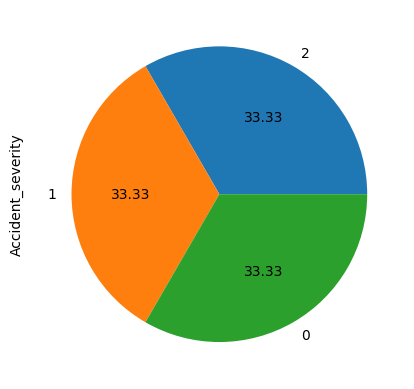

In [260]:
y_res.value_counts().plot.pie(autopct='%.2f')

In [261]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42,stratify=y_res)

In [262]:
X_train.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Area_accident_occured,Road_allignment,Road_surface_conditions,Light_conditions,Weather_conditions
26080,2,5,0,1,0,2,2,5,6,6,0,3,2
17647,4,1,1,2,2,0,3,0,4,9,3,0,4
6741,2,0,0,1,4,0,2,0,7,5,0,3,2
4872,0,3,3,1,4,2,3,14,7,5,0,3,2
29608,3,3,0,1,4,0,2,10,12,5,0,3,2


In [263]:
X_test.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Area_accident_occured,Road_allignment,Road_surface_conditions,Light_conditions,Weather_conditions
11484,0,0,2,1,4,0,1,14,7,5,0,3,2
313,3,2,0,1,4,0,1,6,6,5,2,3,6
5162,3,1,0,1,4,0,4,3,6,5,3,3,4
8263,2,6,2,1,1,0,2,8,9,5,0,0,2
4283,0,0,2,1,1,0,2,5,7,5,0,3,2


In [291]:
y_train

26080    1
17647    0
6741     1
4872     1
29608    1
        ..
13904    0
28145    1
13580    0
3145     2
12071    2
Name: Accident_severity, Length: 24996, dtype: int32

In [264]:
X_train.shape

(24996, 13)

In [265]:
X_test.shape

(6249, 13)

In [266]:
y_train.shape

(24996,)

In [267]:
y_test.shape

(6249,)

In [282]:
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [276]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [277]:
accuracy

0.9299087854056649

In [278]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2083
           1       0.84      1.00      0.91      2083
           2       1.00      0.79      0.88      2083

    accuracy                           0.93      6249
   macro avg       0.94      0.93      0.93      6249
weighted avg       0.94      0.93      0.93      6249



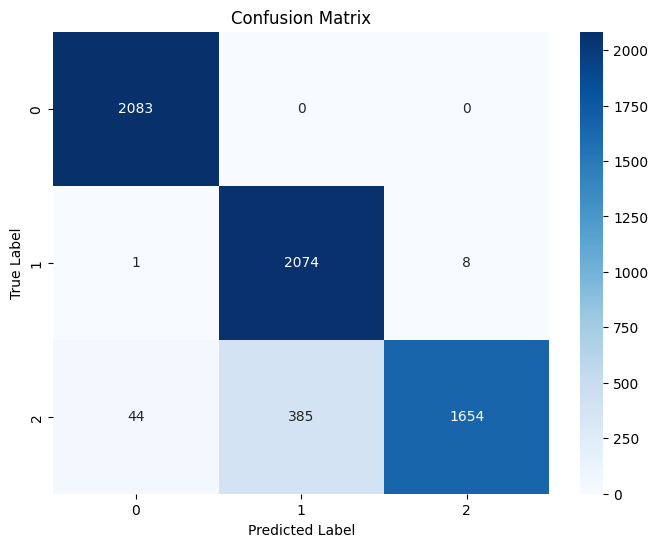

In [283]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [285]:
pickle.dump(model,open('model.pkl','wb'))